In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

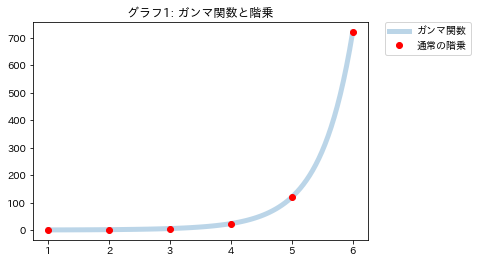

In [2]:
# グラフ描画用関数
from scipy import special

t = np.linspace(2, 7, 100)
plt.plot(t - 1, special.gamma(t).real, linewidth=5, alpha=0.3, label='ガンマ関数')
plt.title("グラフ1: ガンマ関数と階乗")

t = range(1, 7)
plt.plot(t, [math.factorial(_t) for _t in t], marker='o', color='r', linestyle="None", label='通常の階乗')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

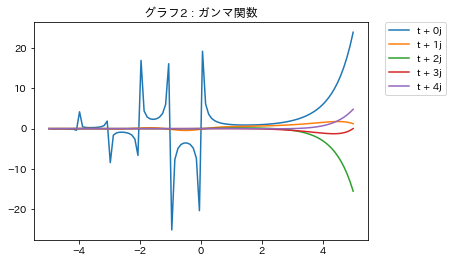

In [3]:
# グラフ描画用関数
from scipy import special

t = np.linspace(-5, 5, 100)

for i in range(5):
    plt.plot(t, special.gamma([complex(_t, i) for _t in t]).real, label='t + {0}j'.format(i))

plt.title("グラフ2 : ガンマ関数")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [4]:
def gamma(z, t):
    """
    t^(z-1) e^(-t)
    :param z: z
    :param t: t
    :return: t^(z-1) e^(-t)
    """
    return (t ** (z - 1)) * (math.e ** -t)

In [5]:
def gamma_riemann_integral(z):
    """
    ガンマ関数
    :param z: z
    :return: ガンマ関数
    """
    s = 0
    t = np.linspace(0, 10000, 10000)

    for i in range(len(t) - 1):
        s += gamma(z, t[i]) * (t[i + 1] - t[i])

    return s


gamma_riemann_integral(5)

24.003334859194855

In [6]:
idx = list()
data = list()

for n in range(2, 11):
    idx.append(n)
    data.append([gamma_riemann_integral(n), math.factorial(n - 1)])

pd.DataFrame(data, index=idx, columns=['ガンマ関数 (独自実装)', 'math.factorial'])

,ガンマ関数 (独自実装),math.factorial
2,0.920658,1
3,1.992292,2
4,6.006515,6
5,24.003335,24
6,119.997826,120
7,719.996933,720
8,5040.001153,5040
9,40320.004679,40320
10,362880.000046,362880


In [7]:
from scipy import special

special.gamma(5)

24.0

In [8]:
# 正解例

from scipy import integrate


def gamma(z, t):
    """
    t^(z-1) e^(-t)
    :param t:
    :return: t^(z-1) e^(-t)
    """
    return (t ** (z - 1)) * (math.e ** -t)


idx = list()
data = list()

for z in range(2, 11):
    idx.append(z)
    y, abserr = integrate.quad(lambda t: gamma(z, t), 0, 10000)
    data.append([y, math.factorial(z - 1)])

pd.DataFrame(data, index=idx, columns=['scipy.integrate.quad', 'math.factorial'])

,scipy.integrate.quad,math.factorial
2,1.0,1
3,2.0,2
4,6.0,6
5,24.0,24
6,120.0,120
7,720.0,720
8,5040.0,5040
9,40320.0,40320
10,362880.0,362880
